# Introduction

The purpose of this notebook is to download data and process it. As a result we will get a dataset ready for further analyses and modeling.

In [1]:
import matplotlib
import matplotlib.pyplot as plt

# let matplotlib plots be part of Jupyter Notebook
%matplotlib inline

# set up higher resolution for matplotlib plots
%config InlineBackend.figure_format = 'retina'

# Data loading and processing pipeline

In [2]:
# Change folder
%cd ../src

/Users/mariuszrokita/GitHub/wroclawski-rower-miejski/bikerentals/src


In [3]:
# execute tests to make sure everything is working as expected
! python -m pytest

============================= test session starts ==============================
platform darwin -- Python 3.6.8, pytest-5.2.2, py-1.8.0, pluggy-0.13.0
rootdir: /Users/mariuszrokita/GitHub/wroclawski-rower-miejski, inifile: tox.ini
collected 16 items                                                             

tests/cleaning/test_extract_gps_from_station_name.py ..                  [ 12%]
tests/cleaning/test_pipeline.py ....                                     [ 37%]
tests/cleaning/test_remove_missing_gps.py ..                             [ 50%]
tests/cleaning/test_remove_same_location.py ...                          [ 68%]
tests/features/test_holidays.py ...                                      [ 87%]
tests/features/test_season.py ..                                         [100%]

============================== 16 passed in 0.89s ==============================


In [4]:
# run data loading and processing pipeline 
# (with soft deleting so that we can inspect everything)
!python run_pipeline.py --remove=0

Pipeline execution started
Root folder set to: /Users/mariuszrokita/GitHub/wroclawski-rower-miejski/bikerentals
* GpsFromStationNameExtractor *
--> input data shape:  (457015, 10)
--> output data shape:  (457015, 10)
* GpsFromStationNameExtractor *
--> input data shape:  (457015, 10)
--> output data shape:  (457015, 10)
* SameLocationRemover *
--> input data shape:  (457015, 10)
--> output data shape:  (457015, 11)
* MissingGpsLocationRemover *
--> input data shape:  (457015, 11)
--> output data shape:  (457015, 11)
* SeasonFeature *
--> input data shape:  (457015, 11)
--> output data shape:  (457015, 12)
* HolidaysFeature *
--> input data shape:  (457015, 12)
--> output data shape:  (457015, 13)
Data saved to: /Users/mariuszrokita/GitHub/wroclawski-rower-miejski/bikerentals/data/processed/bike_rentals.csv
Pipeline execution completed


# Post-processing inspection

In [5]:
import os
import pandas as pd

filepath = os.path.join(os.getcwd(), '..', 'data', 'processed', 'bike_rentals.csv')

In [6]:
# load csv and set proper column types
bike_rentals_df = pd.read_csv(filepath)
bike_rentals_df['Rental datetime'] = pd.to_datetime(bike_rentals_df['Rental datetime'])
bike_rentals_df['Return datetime'] = pd.to_datetime(bike_rentals_df['Return datetime'])
bike_rentals_df['Duration'] = pd.to_timedelta(bike_rentals_df['Duration'])

In [7]:
bike_rentals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457015 entries, 0 to 457014
Data columns (total 13 columns):
Bike number                 457015 non-null int64
Rental datetime             457015 non-null datetime64[ns]
Return datetime             457015 non-null datetime64[ns]
Rental station              457015 non-null object
Return station              457015 non-null object
Duration                    457015 non-null timedelta64[ns]
Rental station latitude     398278 non-null float64
Rental station longitude    398278 non-null float64
Return station latitude     401073 non-null float64
Return station longitude    401073 non-null float64
IsDeleted                   457015 non-null bool
Season                      457015 non-null int64
Holidays                    457015 non-null bool
dtypes: bool(2), datetime64[ns](2), float64(4), int64(2), object(2), timedelta64[ns](1)
memory usage: 39.2+ MB


In [8]:
# deleted records may contain NaN values
bike_rentals_df[bike_rentals_df['IsDeleted'] == True].isnull().sum()

Bike number                     0
Rental datetime                 0
Return datetime                 0
Rental station                  0
Return station                  0
Duration                        0
Rental station latitude     58737
Rental station longitude    58737
Return station latitude     55942
Return station longitude    55942
IsDeleted                       0
Season                          0
Holidays                        0
dtype: int64

In [9]:
# make sure there are no NaN values in records that 
bike_rentals_df[bike_rentals_df['IsDeleted'] == False].isnull().sum()

Bike number                 0
Rental datetime             0
Return datetime             0
Rental station              0
Return station              0
Duration                    0
Rental station latitude     0
Rental station longitude    0
Return station latitude     0
Return station longitude    0
IsDeleted                   0
Season                      0
Holidays                    0
dtype: int64

In [10]:
bike_rentals_df.head()

,Bike number,Rental datetime,Return datetime,Rental station,Return station,Duration,Rental station latitude,Rental station longitude,Return station latitude,Return station longitude,IsDeleted,Season,Holidays
0,57719,2019-06-26 00:00:10,2019-06-26 00:06:19,Skarbowców / Wietrzna,Krzycka / Aleja Karkonoska (Park Południowy),00:06:09,51.073290,16.994850,51.074992,17.007058,False,3,False
1,650480,2019-06-26 00:00:13,2019-06-26 00:06:59,Rynek,Plac Legionów,00:06:46,51.109782,17.030175,51.104413,17.022536,False,3,False
2,650988,2019-06-26 00:00:15,2019-06-26 00:13:32,Poza oficjalną stacją,Wałbrzyska - pętla tramwajowa,00:13:17,NaN,NaN,51.065777,16.988575,True,3,False
3,57603,2019-06-26 00:00:21,2019-06-26 00:23:53,Plac Uniwersytecki (UWr),Legnicka / Wejherowska,00:23:32,51.113871,17.034484,51.125276,16.984447,False,3,False
4,650067,2019-06-26 00:00:40,2019-06-26 00:04:40,Powstańców Śląskich (Arkady Wrocławskie),Powstańców Śląskich (Arkady Wrocławskie),00:04:00,51.099713,17.027905,51.099713,17.027905,True,3,False


# Visual inspection of soft deleted records

In [11]:
print(f"Number of soft deleted records: {bike_rentals_df[bike_rentals_df['IsDeleted'] == True].shape[0]}")

Number of soft deleted records: 167882


## Rentals returned to the same bike station

In [12]:
idx = bike_rentals_df['Rental station'] == bike_rentals_df['Return station']
print(f"Number of records: {bike_rentals_df.loc[idx, :].shape[0]}")

Number of records: 76852


In [13]:
total_seconds = bike_rentals_df.loc[idx, 'Duration'].dt.total_seconds();

print(f"Min: {total_seconds.min()}, Max: {total_seconds.max()}")
print(f"Avg: {total_seconds.mean()}, Std: {total_seconds.std()}")

Min: 0.0, Max: 56135.0
Avg: 520.872091812835, Std: 1387.2647139280132


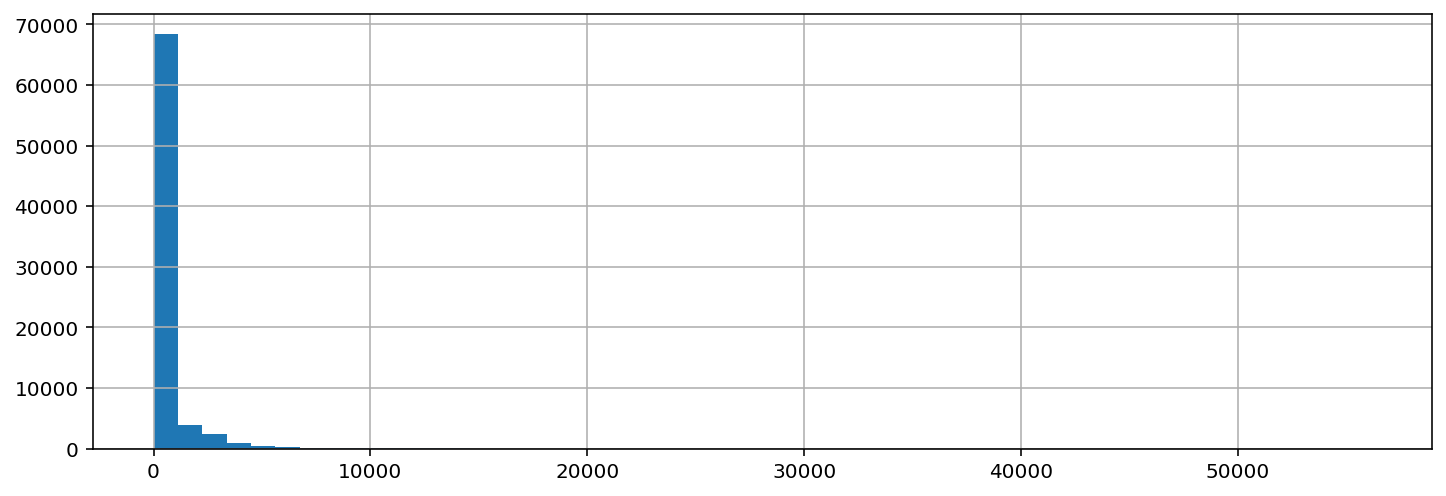

In [14]:
total_seconds.hist(bins=50, figsize=(12, 4));

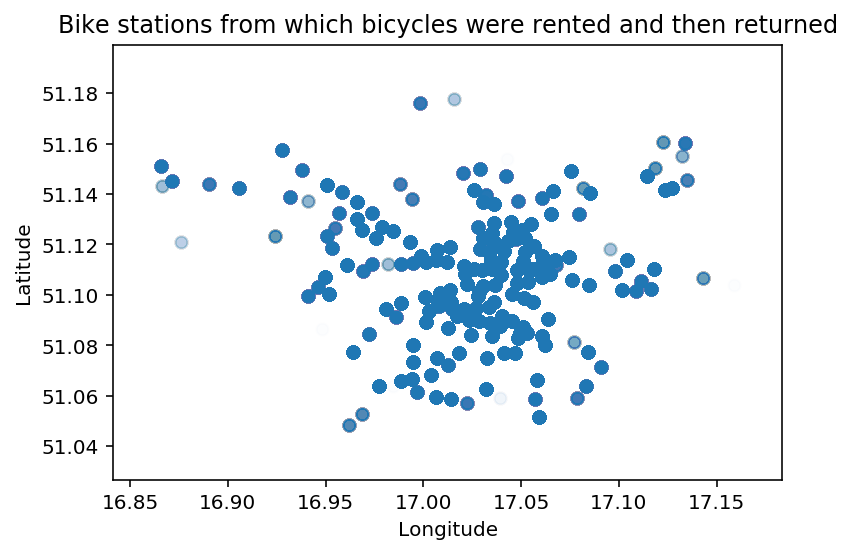

In [15]:
plt.scatter(x=bike_rentals_df.loc[idx, 'Rental station longitude'].values, 
            y=bike_rentals_df.loc[idx, 'Rental station latitude'].values, 
            alpha=0.01)
plt.title('Bike stations from which bicycles were rented and then returned')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show();

In [16]:
bike_rentals_df.loc[idx, 'Rental station'].value_counts()

Poza oficjalną stacją                       4446
Rondo Reagana                               1667
Plac Dominikański (Galeria Dominikańska)    1422
Rynek                                       1421
Kościuszki / Pułaskiego                     1140
                                            ... 
51.098813333333, 17.033382222222               1
51.086671111111, 16.948341111111               1
51.0639402, 16.9844                            1
.RELOKACYJNA A1-4                              1
51.15388, 17.042883333333                      1
Name: Rental station, Length: 221, dtype: int64

In [17]:
bike_rentals_df[bike_rentals_df['Rental station'].str.contains('\d{2}.\d+, \d{2}.\d+', regex=True)]

,Bike number,Rental datetime,Return datetime,Rental station,Return station,Duration,Rental station latitude,Rental station longitude,Return station latitude,Return station longitude,IsDeleted,Season,Holidays
92764,650711,2019-08-05 12:52:12,2019-08-05 13:10:37,"50.984208888889, 16.654945555556",Poza oficjalną stacją,00:18:25,50.984209,16.654946,NaN,NaN,True,3,False
100224,650559,2019-08-06 10:12:00,2019-08-06 10:18:00,"50.97312, 16.630347777778",Poza oficjalną stacją,00:06:00,50.973120,16.630348,NaN,NaN,True,3,False
131095,650116,2019-08-13 17:50:00,2019-08-13 17:59:00,"51.12676, 17.012852222222",Młodych Techników,00:09:00,51.126760,17.012852,51.118899,17.013477,False,3,False
212725,57455,2019-09-01 08:42:00,2019-09-01 08:46:00,"51.081071111111, 17.017463333333",Ślężna / Skierniewicka,00:04:00,51.081071,17.017463,51.077080,17.018240,False,4,True
212726,650945,2019-09-01 08:42:00,2019-09-01 08:54:00,"51.081275555556, 17.017427777778",Powstańcow Śląskich / Aleja Hallera,00:12:00,51.081276,17.017428,51.086689,17.012480,False,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362868,57812,2019-10-03 05:02:00,2019-10-03 05:12:00,"51.167928888889, 16.995647777778",Księgarska / Dekarska / Zduńska,00:10:00,51.167929,16.995648,51.177590,17.015880,False,4,False
363290,650069,2019-10-03 07:37:00,2019-10-03 07:48:00,"51.156373333333, 17.03266",Bezpieczna / Obornicka,00:11:00,51.156373,17.032660,51.141560,17.025870,False,4,False
364060,57761,2019-10-03 10:58:00,2019-10-03 11:03:00,"51.083551111111, 17.074913333333",Opolska / pętla tramwajowa,00:05:00,51.083551,17.074913,51.077480,17.084050,False,4,False
364907,57241,2019-10-03 16:00:00,2019-10-03 16:06:00,"51.136671111111, 17.05744",Aleja Kromera,00:06:00,51.136671,17.057440,51.132259,17.065453,False,4,False


# Run full pipeline

In [18]:
# run data loading and processing pipeline
#!python run_pipeline.py --remove=1